<div style="text-align: center;"> <h3>Exploratory Data Analysis</h3>
<h5>Formative Assessment 5</h5>
<h5>April 30, 2025</h5>    
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

### Task Overview:
You will analyze a dataset containing 5,000 observations of simulated daily store sales, using Poisson regression to examine how sales counts are influenced by:

* Day of the week

* Promotions

* Holidays

* Store size

### Step 1: Load and Explore the Data (10 points)
Import the dataset into R or Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("store_sales_data.csv")
print(df.shape)
df.head()

(5000, 5)


,day_of_week,promo,holiday,store_size,sales_count
0,6,0,0,medium,18
1,3,0,0,medium,13
2,4,0,0,large,24
3,6,1,0,small,16
4,2,0,0,medium,11


Display summary statistics and variable types.

In [4]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day_of_week  5000 non-null   int64 
 1   promo        5000 non-null   int64 
 2   holiday      5000 non-null   int64 
 3   store_size   5000 non-null   object
 4   sales_count  5000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 195.4+ KB
None


,day_of_week,promo,holiday,sales_count
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.985400,0.301200,0.095600,13.726400
std,1.990874,0.458825,0.294071,8.677431
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,7.000000
50%,3.000000,0.000000,0.000000,12.000000
75%,5.000000,1.000000,0.000000,18.000000
max,6.000000,1.000000,1.000000,61.000000


#### Distribution of sales_count

Text(0.5, 1.0, 'PDF of `sales_count`')

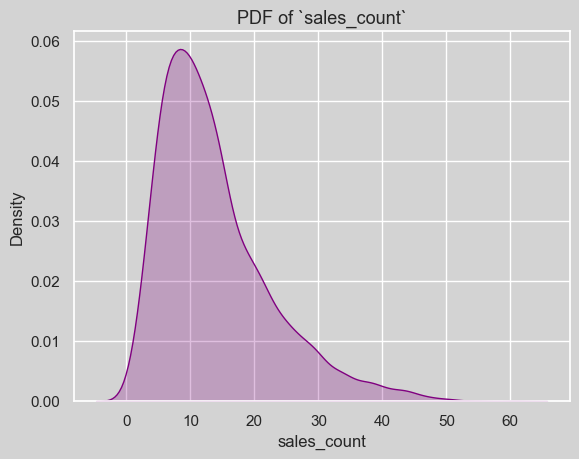

In [47]:
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'lightgrey'
plt.rcParams['axes.facecolor'] = 'lightgrey'

sns.kdeplot(df['sales_count'], fill=True, color="purple")
plt.title("PDF of `sales_count`", size=13)

#### Frequency of each store_size

Text(0, 0.5, 'Frequency')

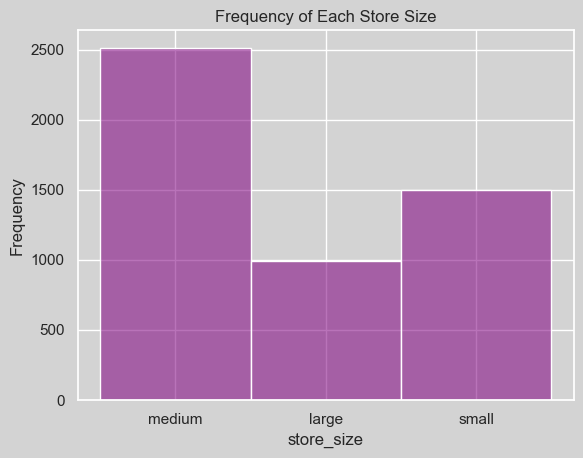

In [48]:
sns.histplot(df.store_size, color="Purple", alpha=0.55)
plt.title("Frequency of Each Store Size")
plt.ylabel("Frequency")

#### Proportion of days with promo and holiday

In [40]:
proportion = df.groupby(['promo', 'holiday']).count()['day_of_week'] / len(df)
label_map = {
    (0, 0): 'No Promo, No Holiday',
    (0, 1): 'No Promo, Holiday',
    (1, 0): 'Promo, No Holiday',
    (1, 1): 'Promo, Holiday'
}

new_index_labels = [label_map[combo] for combo in proportion.index]
proportion.index = new_index_labels
proportion

No Promo, No Holiday    0.6320
No Promo, Holiday       0.0668
Promo, No Holiday       0.2724
Promo, Holiday          0.0288
Name: day_of_week, dtype: float64

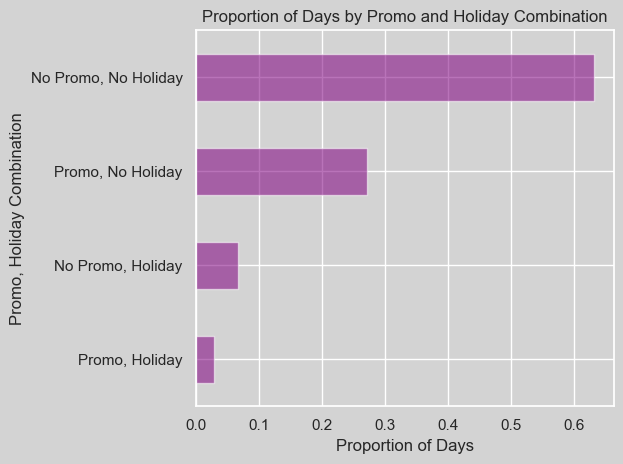

In [50]:
proportion.sort_values(ascending=True).plot(kind="barh", color="Purple", alpha=0.55)

plt.xlabel("Proportion of Days")
plt.ylabel("Promo, Holiday Combination")
plt.title("Proportion of Days by Promo and Holiday Combination")

plt.tight_layout()
plt.show()